In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

In [42]:

nSim = 5*10**4
amostras = 10

energiaRuido = 1

alpha = 5/100

ruido = energiaRuido*rd.randn(amostras,nSim)

limiar = np.quantile(np.mean(ruido,axis=0), 1-alpha)
print('Limiar:', limiar)

sinal = np.zeros((amostras,nSim))
sinalMedio = np.zeros((nSim,))

listaSNRs = np.linspace(-10,1,1000)
probDetec = np.zeros((len(listaSNRs),1))

Ts = 0.01
f0 = 50
tempoTotal = 1
N = tempoTotal/Ts
theta0 = np.pi/6

# senonide tempo discreto
amplitude = 10**(listaSNRs[round(len(listaSNRs)/2)]/20)*(energiaRuido**2)


arg = 2*(np.pi)*f0*(np.linspace(0,N))
cosa = ruido[0,0]+ amplitude*np.cos(theta0+arg);




100.0
Limiar: 0.4396755867170516


In [38]:
# sns.lineplot(x = np.linspace(0,N),y= cosa);
# sns.scatterplot(x = np.linspace(0,N),y= cosa)


In [39]:
print('Simulando')
for i, SNRi in enumerate(listaSNRs):
    amplitude = 10**(SNRi/20)*(energiaRuido**2)

    sinal = ruido+ amplitude*np.cos(theta0+2*(np.pi)*f0*(np.linspace(0,nSim)))

    sinalMedio = np.mean(sinal,axis = 1)

    probDetec[i] = np.mean(sinalMedio>limiar)

print('Done')

Simulando
Done


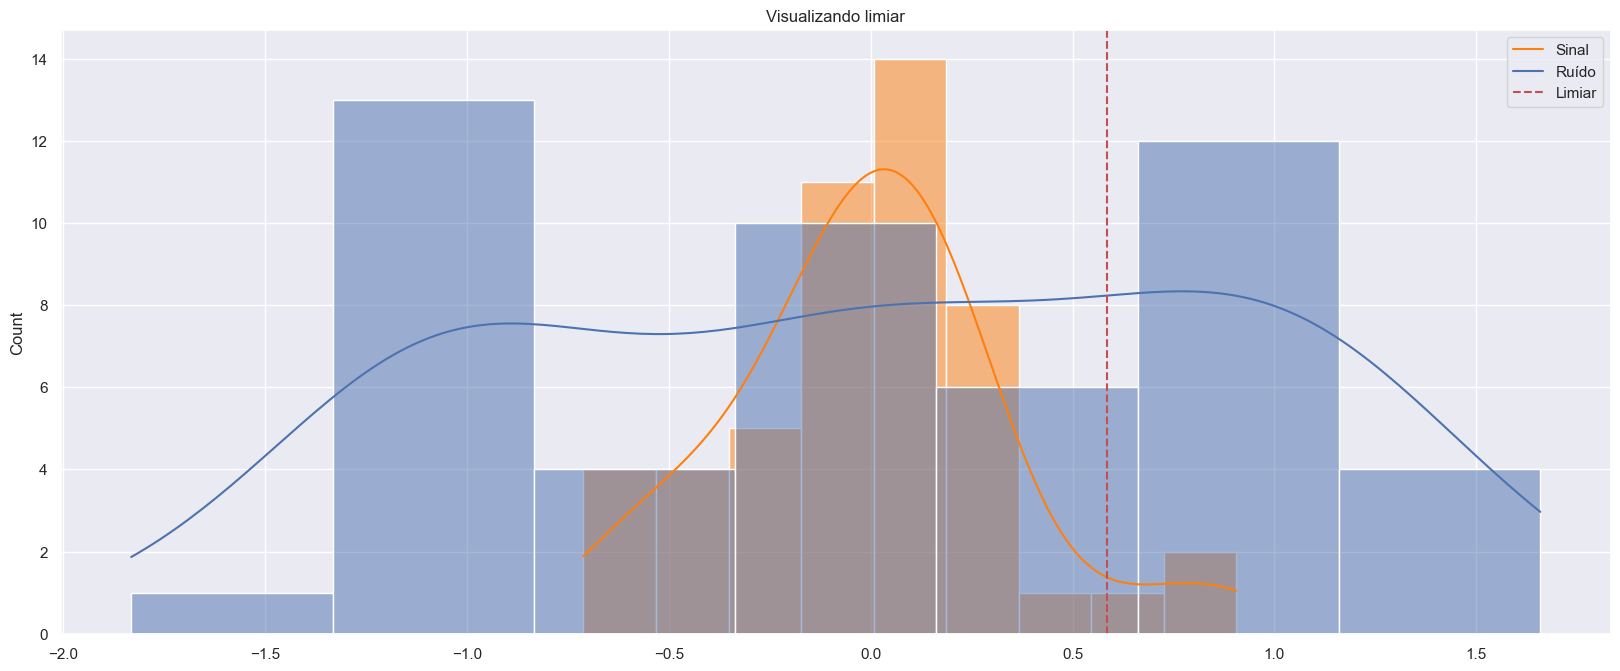

In [40]:
fig,ax = plt.subplots()
sns.histplot(x= np.mean(ruido,axis=0), kde= True,ax=fig.axes[0],color='tab:orange')  
sns.histplot(x= np.mean(sinal,axis=0), kde= True,ax=fig.axes[0])
plt.axvline(limiar, 0,1,c='r',linestyle='--')
fig.axes[0].set_title('Visualizando limiar')
plt.legend(['Sinal','Ruído','Limiar'])

plt.show()